In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [2]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images

In [3]:
# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")

Number of folders (including subfolders): 6
Number of images: 3000


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 
output_dir = '/kaggle/working/split_dataset' 
train_ratio = 0.8  

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: /kaggle/working/split_dataset/train
Test directory: /kaggle/working/split_dataset/test


Random Train Images:
Showing random images from category: mountain


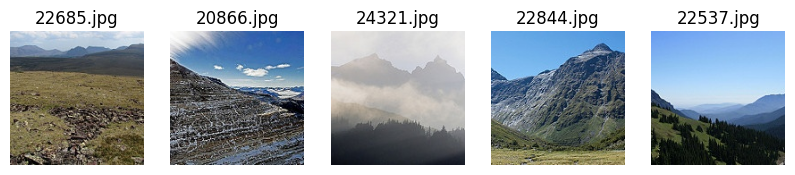

Random Test Images:
Showing random images from category: forest


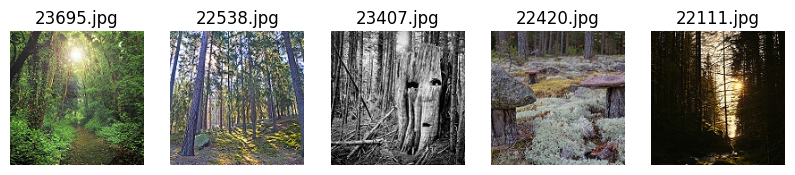

In [5]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 

def show_random_images(directory, num_images=5):
    """
    Display random images from a directory.
    
    Args:
        directory (str): Path to the directory containing category subfolders.
        num_images (int): Number of random images to display.
    """
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('/kaggle/working/split_dataset/train')

print("Random Test Images:")
show_random_images('/kaggle/working/split_dataset/test')


In [6]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
import seaborn as sns

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD
# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head with Dropout
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.6))  # Add Dropout after the dense layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = SGD(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [10]:
num_classes = 6  
model = define_model(num_classes)

# Summary of the model
model.summary()

ValueError: Undefined shapes are not supported.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [18]:
def plot_pr_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


In [19]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [20]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=True
    )

    # Train and test directories
    train_dir = '/kaggle/working/split_dataset/train'
    test_dir = '/kaggle/working/split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Get the layers for the VGG16 blocks
    base_model = model.layers[0]  # VGG16 base model
    blocks = [
        base_model.get_layer('block3_conv3'),  # 3rd block   
    ]

    # Training loop: progressively unfreeze blocks
    for i in range(len(blocks)):
        # Unfreeze the current block and freeze previous blocks
        for layer in base_model.layers:
            layer.trainable = False
        for j in range(i, len(blocks)):
            blocks[j].trainable = True

        # Recompile the model after unfreezing layers
        model.compile(optimizer=Adam(learning_rate=0.0001), 
                      loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        #print(f"Training with block {5 - i} unfrozen...")
        history = model.fit(
            train_it,
            validation_data=test_it,
            epochs=50
        )

        # Plot accuracy and loss curves for comparison
        plot_curves(history)

        # Evaluate model on test data
        test_steps = len(test_it)
        y_probs = model.predict(test_it, steps=test_steps, verbose=1)
        y_pred = np.argmax(y_probs, axis=1)
        y_true = test_it.classes

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)

        # Plot Confusion Matrix
        class_names = list(test_it.class_indices.keys())
        plot_confusion_matrix(cm, class_names)

        # Classification Report
        report = classification_report(y_true, y_pred, target_names=class_names)
        print("Classification Report:\n", report)

        # One-hot encode y_true
        y_true_one_hot = np.zeros((len(y_true), num_classes))
        y_true_one_hot[np.arange(len(y_true)), y_true] = 1

        # Precision-Recall Curves
        plot_pr_curve(y_true_one_hot, y_probs, num_classes)

        # Save Confusion Matrix to CSV
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        cm_df.to_csv(f'confusion_matrix_block_{5 - i}.csv', index=True)

        # Save classification report
        report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()
        report_df.to_csv(f'classification_report_block_{5 - i}.csv', index=True)

    print("Model training and evaluation complete.")



Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 414ms/step - accuracy: 0.4028 - loss: 1.5135 - val_accuracy: 0.7724 - val_loss: 0.6131
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 372ms/step - accuracy: 0.7605 - loss: 0.6653 - val_accuracy: 0.8322 - val_loss: 0.4798
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 375ms/step - accuracy: 0.7928 - loss: 0.5726 - val_accuracy: 0.8605 - val_loss: 0.4060
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 376ms/step - accuracy: 0.8445 - loss: 0.4552 - val_accuracy: 0.8588 - val_loss: 0.3772
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 382ms/step - accuracy: 0.8387 - loss: 0.4681 - val_accuracy: 0.8771 - val_loss: 0.3560
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 378ms/step - accuracy: 0.8644 - loss: 0.3967 - val_accuracy: 0.8953 - val_loss: 0.3003
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.8722 - loss: 0.3527 - val_accuracy: 0.8605 - val_loss: 0.3560
Epoch 8/50
75/

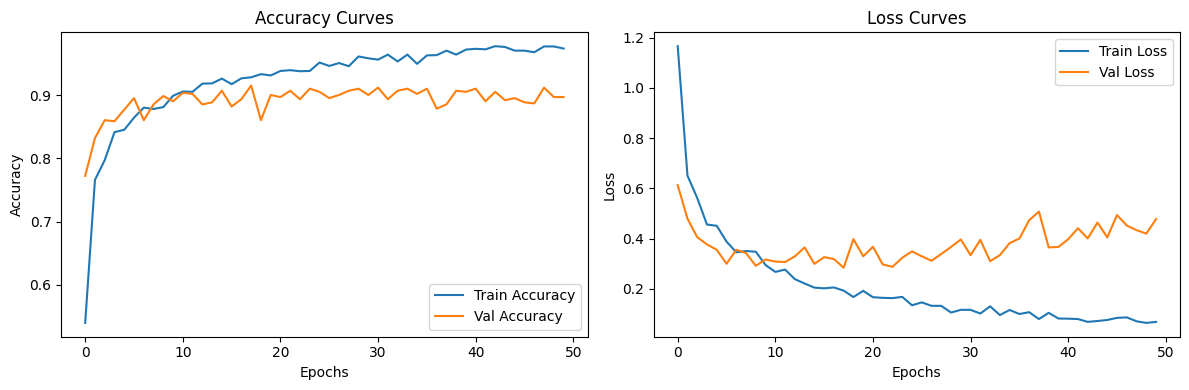

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step
Confusion Matrix:
 [[78  0  0  0  0 10]
 [ 1 91  0  1  0  2]
 [ 0  0 99  7  5  0]
 [ 0  0 18 80  7  0]
 [ 1  0  2  2 97  0]
 [ 4  0  0  2  0 95]]


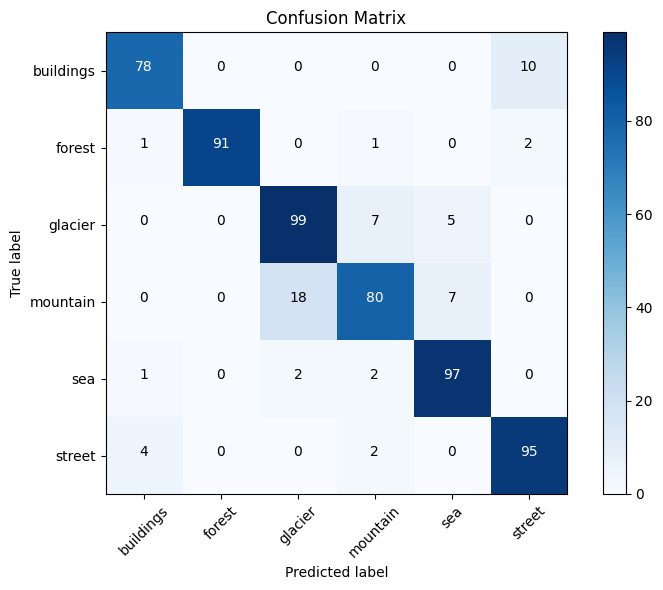

Classification Report:
               precision    recall  f1-score   support

   buildings       0.93      0.89      0.91        88
      forest       1.00      0.96      0.98        95
     glacier       0.83      0.89      0.86       111
    mountain       0.87      0.76      0.81       105
         sea       0.89      0.95      0.92       102
      street       0.89      0.94      0.91       101

    accuracy                           0.90       602
   macro avg       0.90      0.90      0.90       602
weighted avg       0.90      0.90      0.90       602



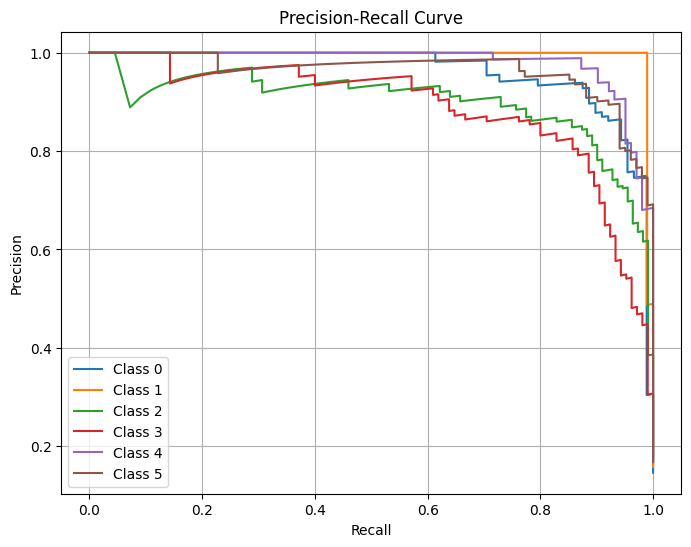

Model training and evaluation complete.


In [21]:
run_test_harness()